In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#read dataset into dataframe using pandas
df = pd.read_csv('train.csv') 

In [50]:
#read values from the dataframe
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [51]:
#get summary of numerical variables

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [52]:
#for non-numerical values
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

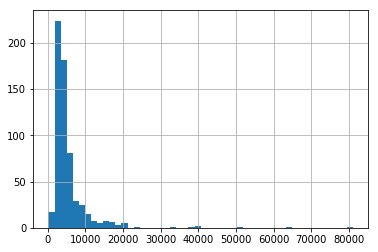

In [53]:
df['ApplicantIncome'].hist(bins = 50)
plt.show()

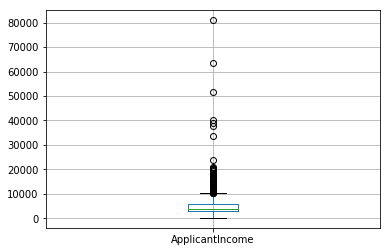

In [54]:
df.boxplot(column = 'ApplicantIncome')
plt.show()

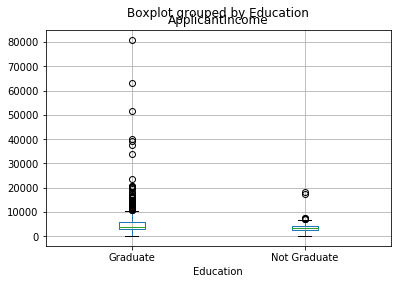

In [55]:
df.boxplot(column = 'ApplicantIncome' , by = 'Education')
plt.show()

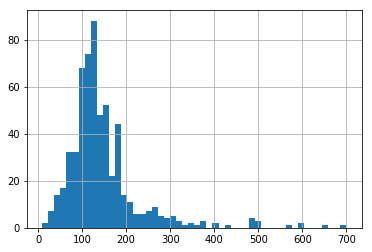

In [56]:
df['LoanAmount'].hist(bins = 50)

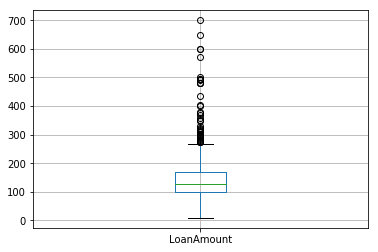

In [57]:
df.boxplot(column = 'LoanAmount')

In [58]:
df['Loan_Status'].value_counts(ascending = True)

N    192
Y    422
Name: Loan_Status, dtype: int64

In [59]:
#females who are not graduate and got a loan. 
df.loc[(df['Gender'] == "Female") & (df['Education'] == "Not Graduate") & (df["Loan_Status"]=="Y"), \
       ["Gender","Education"]]

,Gender,Education
50,Female,Not Graduate
197,Female,Not Graduate
205,Female,Not Graduate
279,Female,Not Graduate
403,Female,Not Graduate
407,Female,Not Graduate
439,Female,Not Graduate
463,Female,Not Graduate
468,Female,Not Graduate
480,Female,Not Graduate


In [60]:
#imputing data , pivot_table

impute_grps = df.pivot_table(values = 'LoanAmount', index = [ 'Self_Employed','Married'], aggfunc = np.mean)

print (impute_grps)

                       LoanAmount
Self_Employed Married            
No            No       121.186747
              Yes      152.509554
Yes           No       160.296296
              Yes      178.076923


In [61]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:' )
print (temp1)

print ('\nProbility of getting loan for each Credit History class:' )
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


In [62]:
pd.crosstab(df['Credit_History'], df['Loan_Status'], margins = True)


Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [18]:
#data munging

In [63]:
#checking missing values in dataset

df.apply(lambda x: sum(x.isnull()), axis = 0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#Hypothesis: LoanAmount greatly depends on Education and SelfEmployment



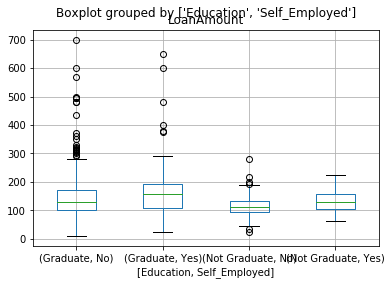

In [64]:
#Plot Hypothesis
df.boxplot(column = 'LoanAmount', by = ['Education','Self_Employed'])
plt.show()

In [27]:
#Make sure Education and Self-Employment dont have missing values

In [65]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [66]:
#No has a greater value than yes in self-employed. Therefore use No for missing values

df['Self_Employed'].fillna('No',inplace = True)

In [36]:
#create a Pivot table, which provides us median values 
#for all the groups of unique values of Self_Employed and Education features

In [67]:
table = df.pivot_table(values = 'LoanAmount', index = 'Self_Employed' , columns = 'Education', aggfunc = np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [44]:
#define a function which returns the values of thepivot table
#cells and apply it to fill the missing values of loan amount

In [68]:
#define function
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]

#replace missing values

df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage , axis = 1) ,inplace = True)

In [70]:
#check missing values in load
#no missing values should be found

df.apply(lambda x: sum(x.isnull()), axis = 0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [71]:
#dealing with extreme values in LoanAmount and ApplicantIncome

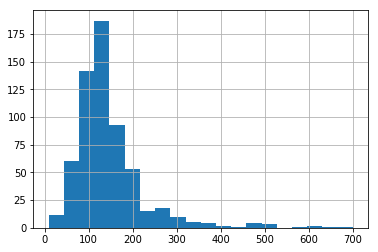

In [77]:
#LoanAmount original

df['LoanAmount'].hist(bins = 20)

In [82]:
print(np.min(df['LoanAmount']))
print(np.max(df['LoanAmount']))

9.0
700.0


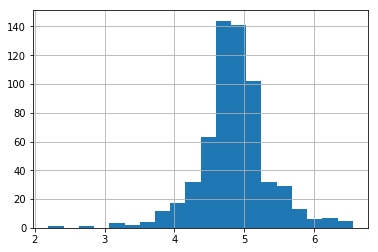

In [83]:
#using log transformation to nullify their effect

df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins = 20)

In [84]:
#ApplicantIncome:One intuition can be that some applicants have lower income but strong support Co-applicants. S
#o it might be a good idea to combine both incomes as total income and take a log transformation of the same.

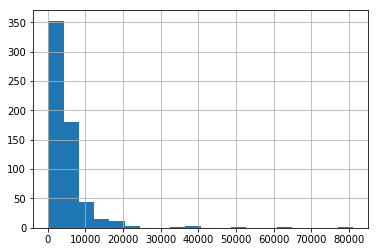

In [89]:
#ApplicantIncome original

df['ApplicantIncome'].hist(bins = 20)

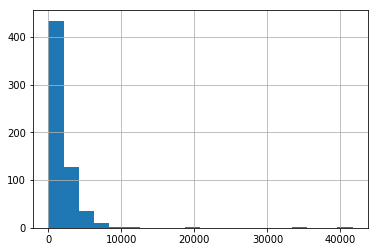

In [90]:
#Co-applicant Income

df['CoapplicantIncome'].hist(bins = 20)

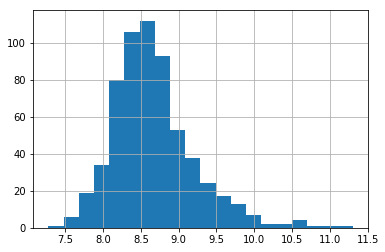

In [91]:
#log transformation for tot_inc = app_inc + coapp_inc

df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

df['TotalIncome_log'] = np.log(df['TotalIncome'])

df['TotalIncome_log'].hist(bins = 20)

In [94]:
#check for other missing values

df.apply(lambda x: sum(x.isnull()), axis = 0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [96]:
#Gender

df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [98]:
 #fill missing gender as male
df['Gender'].fillna('Male', inplace = True)

In [100]:
#check for other missing values

df.apply(lambda x: sum(x.isnull()), axis = 0)

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [102]:
#Married

df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [106]:
df['Married'].fillna('Yes', inplace = True)

In [107]:
df['Dependents'].head(20)

0      0
1      1
2      0
3      0
4      0
5      2
6      0
7     3+
8      2
9      1
10     2
11     2
12     2
13     0
14     2
15     0
16     1
17     0
18     0
19     0
Name: Dependents, dtype: object

In [108]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [110]:
df['Dependents'].fillna('0', inplace = True)

In [113]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [118]:
import scipy.stats as sp
sp.mode(df['Loan_Amount_Term']).mode[0]

360.0

In [120]:
#missing Loan_Amount_Term as its mode

df['Loan_Amount_Term'].fillna('360', inplace = True)

In [122]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [124]:
df['Credit_History'].fillna('1.0', inplace = True)

In [127]:
df.apply(lambda x: sum(x.isnull()), axis = 0)
#No missing data

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [ ]:
#sklearn requires all inputs to be numeric,
#we should convert all our categorical variables into numeric by encoding the categories. 

In [130]:
#encoding the categories
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education',
           'Self_Employed','Property_Area','Loan_Status']

le = LabelEncoder()

for x in var_mod:
    df[x] = le.fit_transform(df[x])
    
df.dtypes


Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [160]:
# import the required modules.

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold     #cross_validation replaced by model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier , export_graphviz
from sklearn import metrics

#define a generic classification function 
#which takes a model as input and determines the Accuracy and Cross-Validation scores.

In [161]:
#Generic function for making a classification model and accessing performance:

def classification_model(model, df, predictors, outcome):
    
    model.fit(df[predictors],df[outcome])   #fit the data
    
    predictions = model.predict(df[predictors])   #make predictions on training set
    
    accuracy = metrics.accuracy_score(predictions,df[outcome])  #Calculate accuracy
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
    
    kf = KFold(df.shape[0], n_folds = 5)   #K-form cross validation with 5 folds
    
    error = []
    
    for train,test in kf:
        
        train_predictors = (df[predictors].iloc[train,:])  #filter training data
        
        train_target = df[outcome].iloc[train]   #The target we're using to train the algorithm.
        
        model.fit(train_predictors, train_target)    #Training the algorithm using predictors and target
        
         #Record error from each cross-validation run
        error.append(model.score(df[predictors].iloc[test,:], df[outcome].iloc[test]))
        
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
    model.fit(df[predictors],df[outcome])   #Fit the model again so that it can be refered outside the function:

        
 

#LogisticRegression

model = LogisticRegression()
predictor_var = ['Credit_History']
outcome_var = 'LoanStatus'
classification_model(model,df, predictive_var, outcome_var)


In [163]:
#LogisticRegression

model = LogisticRegression()
predictor_var = ['Credit_History']
outcome_var = 'Loan_Status'
classification_model(model, df, predictor_var, outcome_var)


Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [166]:
#different combination of variables for LogisticRegression -Without credit history
predictor_var = ['Education','Married','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 68.730%
Cross-Validation Score : 68.729%


In [183]:
#DecisionTree

model = DecisionTreeClassifier()
predictor_var = ['Credit_History']
outcome_var = 'Loan_Status'
classification_model(model, df, predictor_var, outcome_var)


Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [184]:
model = DecisionTreeClassifier()

predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [185]:
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, df,predictor_var,outcome_var)

#overfitting

Accuracy : 88.925%
Cross-Validation Score : 69.536%


In [176]:
#RandomForestClassifier- gives an important feature matrix

model = RandomForestClassifier(n_estimators = 100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 78.342%


Accuracy 100%- overfitting


In [178]:
#get the important features matrix

imp_features = pd.Series(model.feature_importances_, index = predictor_var).sort_values(ascending = False)

imp_features

TotalIncome_log     0.268744
Credit_History      0.264207
LoanAmount_log      0.219966
Dependents          0.053739
Property_Area       0.050853
Loan_Amount_Term    0.045677
Married             0.025557
Education           0.025154
Gender              0.023220
Self_Employed       0.022882
dtype: float64

In [182]:
#Using top 5 variables from the important features and changing the RFC parameters a bit
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

#reduced accuracy but increased cross validation score

Accuracy : 83.225%
Cross-Validation Score : 80.621%
